In [49]:
import pandas as pd
import numpy as np

In [50]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [51]:
df = pd.read_csv('hurricane.csv')
df.shape

(60, 4)

In [52]:
df.head(12)

,Month,Year,Store,County
0,January,2012,NaN,NaN
1,February,2012,NaN,NaN
2,March,2012,NaN,NaN
3,April,2012,NaN,NaN
4,May,2012,NaN,NaN
5,June,2012,NaN,NaN
6,July,2012,NaN,NaN
7,August,2012,NaN,NaN
8,September,2012,1.71,55.8
9,October,2012,1.90,56.4


In [53]:
df.dtypes

Month      object
Year        int64
Store     float64
County    float64
dtype: object

In [54]:
# Create new column Date for plotting

In [55]:
df['Year'] = df['Year'].astype(str)
df.dtypes

Month      object
Year       object
Store     float64
County    float64
dtype: object

In [56]:
# Combine Month+Year into new column Date

In [57]:
aux = pd.to_datetime(df['Year'] + df['Month'], format='%Y%B')
df.insert(0,'Date',aux)
df[:12]

,Date,Month,Year,Store,County
0,2012-01-01,January,2012,NaN,NaN
1,2012-02-01,February,2012,NaN,NaN
2,2012-03-01,March,2012,NaN,NaN
3,2012-04-01,April,2012,NaN,NaN
4,2012-05-01,May,2012,NaN,NaN
5,2012-06-01,June,2012,NaN,NaN
6,2012-07-01,July,2012,NaN,NaN
7,2012-08-01,August,2012,NaN,NaN
8,2012-09-01,September,2012,1.71,55.8
9,2012-10-01,October,2012,1.90,56.4


In [58]:
# Convert Year back to numeric

In [59]:
df['Year'] = pd.to_numeric(df['Year'])
df.dtypes

Date      datetime64[ns]
Month             object
Year               int64
Store            float64
County           float64
dtype: object

### 1. Estimated sales of Carlson Store had there been no hurricane

In [60]:
model1 = smf.ols('Store ~ Year + C(Month)',data = df).fit()
# Add column with predicted values
df.insert(4,'Store_pred',model1.predict(df))
df.tail(9)

,Date,Month,Year,Store,Store_pred,County
51,2016-04-01,April,2016,2.48,2.487500,58.2
52,2016-05-01,May,2016,2.73,2.702500,60.0
53,2016-06-01,June,2016,2.37,2.482500,57.0
54,2016-07-01,July,2016,2.31,2.477500,57.6
55,2016-08-01,August,2016,2.23,2.542500,61.8
56,2016-09-01,September,2016,NaN,2.230833,69.0
57,2016-10-01,October,2016,NaN,2.548333,75.0
58,2016-11-01,November,2016,NaN,3.108333,85.2
59,2016-12-01,December,2016,NaN,4.520833,121.8


### Store sales lost had there been no hurricane

In [61]:
loss = df['Store_pred'].tail(4)
loss

56    2.230833
57    2.548333
58    3.108333
59    4.520833
Name: Store_pred, dtype: float64

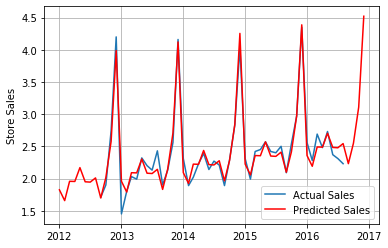

In [62]:
#plt.figure(figsize = (14,6))
plt.plot(df['Date'],df['Store'],label='Actual Sales',markersize = 4)
plt.plot(df['Date'],df['Store_pred'],'r',label='Predicted Sales')
plt.xlabel("")
plt.ylabel("Store Sales")
plt.legend()
plt.grid();

### 2. Estimate of county-wide store sales had there been no hurricane

In [63]:
# split County sales in two parts: 2012-Aug 2016, and, Sep 2016-Dec 2016

In [64]:
df2a = df.loc[0:55].copy()
df2a.head()

,Date,Month,Year,Store,Store_pred,County
0,2012-01-01,January,2012,NaN,1.824167,NaN
1,2012-02-01,February,2012,NaN,1.656667,NaN
2,2012-03-01,March,2012,NaN,1.956667,NaN
3,2012-04-01,April,2012,NaN,1.954167,NaN
4,2012-05-01,May,2012,NaN,2.169167,NaN


In [65]:
df2a.tail()

,Date,Month,Year,Store,Store_pred,County
51,2016-04-01,April,2016,2.48,2.4875,58.2
52,2016-05-01,May,2016,2.73,2.7025,60.0
53,2016-06-01,June,2016,2.37,2.4825,57.0
54,2016-07-01,July,2016,2.31,2.4775,57.6
55,2016-08-01,August,2016,2.23,2.5425,61.8


In [66]:
df2b = df.loc[56:60]
df2b

,Date,Month,Year,Store,Store_pred,County
56,2016-09-01,September,2016,NaN,2.230833,69.0
57,2016-10-01,October,2016,NaN,2.548333,75.0
58,2016-11-01,November,2016,NaN,3.108333,85.2
59,2016-12-01,December,2016,NaN,4.520833,121.8


In [67]:
# Build a model for County sales using
# 2012-Aug 2016 data to exclude hurricane effect

In [68]:
model2 = smf.ols('County ~ Year + C(Month)',data = df2a).fit()
model2.rsquared

0.9692783821434721

In [69]:
df2a['County_pred'] = model2.predict(df2a)
df2a.tail()

,Date,Month,Year,Store,Store_pred,County,County_pred
51,2016-04-01,April,2016,2.48,2.4875,58.2,55.1925
52,2016-05-01,May,2016,2.73,2.7025,60.0,58.0425
53,2016-06-01,June,2016,2.37,2.4825,57.0,54.1425
54,2016-07-01,July,2016,2.31,2.4775,57.6,53.0925
55,2016-08-01,August,2016,2.23,2.5425,61.8,59.3925


In [70]:
# Predicted County sales (assuming no hurricane) for Sep 2016-Dec 2016

In [71]:
yhat = model2.predict(df2b)
yhat

56     49.8875
57     51.9875
58     66.2375
59    105.6875
dtype: float64

### 3. Find monthly ratios of actual vs. predicted county sales.

In [72]:
# Actual County sales during Sep 2016-Dec 2016 

In [74]:
y = df['County'].tail(4)
y

56     69.0
57     75.0
58     85.2
59    121.8
Name: County, dtype: float64

In [75]:
# New DataFrame with Monthly ratios

In [76]:
excess = pd.DataFrame()
excess['County_Sales'] = y
excess['Pred_Sales'] = yhat
ratio = y/yhat
excess['ratio'] = ratio
excess

,County_Sales,Pred_Sales,ratio
56,69.0,49.8875,1.383112
57,75.0,51.9875,1.442654
58,85.2,66.2375,1.286280
59,121.8,105.6875,1.152454


### 4. Sales lost (regular + excess) by Carlson Department Store

In [77]:
excess['loss'] = loss
excess['Total_loss'] = ratio * loss
excess

,County_Sales,Pred_Sales,ratio,loss,Total_loss
56,69.0,49.8875,1.383112,2.230833,3.085492
57,75.0,51.9875,1.442654,2.548333,3.676365
58,85.2,66.2375,1.286280,3.108333,3.998188
59,121.8,105.6875,1.152454,4.520833,5.210053


In [78]:
# last column shows sales of Carlson 
# (if store was not hit by hurricane)

In [79]:
# Sum of last column

In [80]:
excess.Total_loss.sum()

15.97009842887271

In [81]:
# Carlson Department Stores can claim to the insurance company 
# for a business interruption of $ 15,972,000

### 5. Carlson's Market Share

In [82]:
df['Market_share'] = df['Store']/df['County']
df.tail(6)

,Date,Month,Year,Store,Store_pred,County,Market_share
54,2016-07-01,July,2016,2.31,2.477500,57.6,0.040104
55,2016-08-01,August,2016,2.23,2.542500,61.8,0.036084
56,2016-09-01,September,2016,NaN,2.230833,69.0,NaN
57,2016-10-01,October,2016,NaN,2.548333,75.0,NaN
58,2016-11-01,November,2016,NaN,3.108333,85.2,NaN
59,2016-12-01,December,2016,NaN,4.520833,121.8,NaN


In [83]:
# Predict Market share

In [84]:
model5 = smf.ols('Market_share ~ Year + C(Month)',data = df).fit()

In [85]:
df['Market_pred'] = model5.predict(df)
df.tail(12)

,Date,Month,Year,Store,Store_pred,County,Market_share,Market_pred
48,2016-01-01,January,2016,2.56,2.357500,48.0,0.053333,0.051116
49,2016-02-01,February,2016,2.28,2.190000,51.6,0.044186,0.045566
50,2016-03-01,March,2016,2.69,2.490000,57.6,0.046701,0.043651
51,2016-04-01,April,2016,2.48,2.487500,58.2,0.042612,0.044851
52,2016-05-01,May,2016,2.73,2.702500,60.0,0.045500,0.046524
53,2016-06-01,June,2016,2.37,2.482500,57.0,0.041579,0.045507
54,2016-07-01,July,2016,2.31,2.477500,57.6,0.040104,0.046218
55,2016-08-01,August,2016,2.23,2.542500,61.8,0.036084,0.042886
56,2016-09-01,September,2016,NaN,2.230833,69.0,NaN,0.043939
57,2016-10-01,October,2016,NaN,2.548333,75.0,NaN,0.048029


### 6. Monthly Total sales lost by Carlson Department Store - Approach 2

In [88]:
df6 = df.loc[56:60].copy()
df6

,Date,Month,Year,Store,Store_pred,County,Market_share,Market_pred
56,2016-09-01,September,2016,NaN,2.230833,69.0,NaN,0.043939
57,2016-10-01,October,2016,NaN,2.548333,75.0,NaN,0.048029
58,2016-11-01,November,2016,NaN,3.108333,85.2,NaN,0.047847
59,2016-12-01,December,2016,NaN,4.520833,121.8,NaN,0.046326


In [89]:
df6['Total_loss'] = df['Market_pred'] * df['County']
df6

,Date,Month,Year,Store,Store_pred,County,Market_share,Market_pred,Total_loss
56,2016-09-01,September,2016,NaN,2.230833,69.0,NaN,0.043939,3.031775
57,2016-10-01,October,2016,NaN,2.548333,75.0,NaN,0.048029,3.602180
58,2016-11-01,November,2016,NaN,3.108333,85.2,NaN,0.047847,4.076529
59,2016-12-01,December,2016,NaN,4.520833,121.8,NaN,0.046326,5.642558


In [90]:
# last column shows lost sales of Carlson 
# (if store was not hit by hurricane)

In [91]:
# Sum of last column

In [92]:
df6.Total_loss.sum()

16.353041384069638

In [93]:
# Carlson Department Stores can claim to the insurance company 
# for a business interruption of $ 16,353,041